In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from tensorflow import keras

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.utils.multiclass import unique_labels

In [3]:
df_train = pd.read_csv('fraudTrain.csv')
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df_test = pd.read_csv("fraudTest.csv")
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df = pd.concat([df_test, df_train])
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


Proportion of the classes in the data:
0    0.99479
1    0.00521
Name: is_fraud, dtype: float64


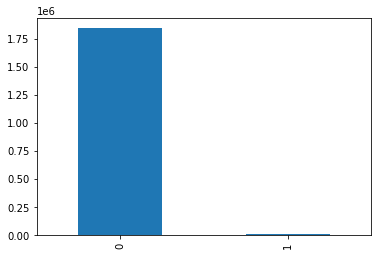

In [6]:
# Assessing the balance of the class label (fraud vs no fraud).
df['is_fraud'].value_counts().plot.bar()
print('Proportion of the classes in the data:')
print(df['is_fraud'].value_counts() / len(df))

In [7]:
df['is_fraud'].value_counts()

# The target variable is imbalanced

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [8]:
# Checking for missing values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

- Thus, there are no missing values

In [9]:
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [10]:
# Investigating whether there is multicollinearity in the dataset - that requires cleaning. 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-10-80861367a22e>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.17,0.00,-0.00,0.00
cc_num,0.00,1.00,0.00,0.04,-0.06,-0.05,-0.01,0.00,-0.06,-0.05,-0.00
amt,0.00,0.00,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.21
zip,0.00,0.04,0.00,1.00,-0.11,-0.91,0.08,0.00,-0.11,-0.91,-0.00
lat,0.00,-0.06,-0.00,-0.11,1.00,-0.01,-0.15,0.00,0.99,-0.01,0.00
long,-0.00,-0.05,-0.00,-0.91,-0.01,1.00,-0.05,-0.00,-0.01,1.00,0.00
city_pop,-0.00,-0.01,0.00,0.08,-0.15,-0.05,1.00,-0.00,-0.15,-0.05,0.00
unix_time,0.17,0.00,-0.00,0.00,0.00,-0.00,-0.00,1.00,0.00,-0.00,-0.01
merch_lat,0.00,-0.06,-0.00,-0.11,0.99,-0.01,-0.15,0.00,1.00,-0.01,0.00
merch_long,-0.00,-0.05,-0.00,-0.91,-0.01,1.00,-0.05,-0.00,-0.01,1.00,0.00


In [11]:
# Dropping columns
df = df.drop(columns=['Unnamed: 0'])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [12]:
# Dropping columns
df = df.drop(columns=['merch_long', 'merch_lat'])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  is_fraud               int64  
dtypes: float64(3), int64(5), object(12)
memory usage: 296.8+ MB


In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class SafeLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = LabelEncoder()
    
    def fit(self, X, y=None):
        self.encoder.fit(X)
        self.classes_ = self.encoder.classes_
        return self
    
    def transform(self, X):
        X_encoded = X.apply(lambda x: x if x in self.classes_ else 'other')
        return self.encoder.transform(X_encoded)

In [15]:
categorical_features = ["merchant", "category", "city", "job"]  
encoder = SafeLabelEncoder()
for col in categorical_features:
    df[col] = encoder.fit_transform(df[col])

In [16]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,is_fraud
0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,M,351 Darlene Green,168,SC,29209,33.9659,-80.9355,333497,288,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,0
1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,F,3638 Marsh Union,16,UT,84002,40.3207,-110.4360,302,406,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,0
2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,F,9333 Valentine Point,64,NY,11710,40.6729,-73.5365,34496,272,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,0
3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,814,FL,32780,28.5697,-80.8191,54767,422,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,0
4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,262,MI,49632,44.2529,-85.0170,1126,205,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,0


In [17]:
df = df.drop(columns=["trans_date_trans_time", 'first', 'last', 'gender', 'street','dob','trans_num', 'unix_time'])
df.head()

,cc_num,merchant,category,amt,city,state,zip,lat,long,city_pop,job,is_fraud
0,2291163933867244,319,10,2.86,168,SC,29209,33.9659,-80.9355,333497,288,0
1,3573030041201292,591,10,29.84,16,UT,84002,40.3207,-110.4360,302,406,0
2,3598215285024754,611,5,41.28,64,NY,11710,40.6729,-73.5365,34496,272,0
3,3591919803438423,222,9,60.05,814,FL,32780,28.5697,-80.8191,54767,422,0
4,3526826139003047,292,13,3.19,262,MI,49632,44.2529,-85.0170,1126,205,0


In [23]:
df = df.drop(columns=['state','city_pop'])
df.head()

,cc_num,merchant,category,amt,city,zip,lat,long,job,is_fraud
0,2291163933867244,319,10,2.86,168,29209,33.9659,-80.9355,288,0
1,3573030041201292,591,10,29.84,16,84002,40.3207,-110.4360,406,0
2,3598215285024754,611,5,41.28,64,11710,40.6729,-73.5365,272,0
3,3591919803438423,222,9,60.05,814,32780,28.5697,-80.8191,422,0
4,3526826139003047,292,13,3.19,262,49632,44.2529,-85.0170,205,0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [30]:
X = df[['cc_num', 'merchant', 'category', 'amt', 'city', 'zip', 'lat', 'long','job']]
y = df["is_fraud"]

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(X.dtypes)

cc_num        int64
merchant      int32
category      int32
amt         float64
city          int32
zip           int64
lat         float64
long        float64
job           int32
dtype: object


In [33]:
X['cc_num'] = X['cc_num'].astype(float)  
X['merchant'] = X['merchant'].astype(float)
X['category'] = X['category'].astype(float)
X['city'] = X['city'].astype(float)
X['zip'] = X['zip'].astype(float)
X['job'] = X['job'].astype(float)

<ipython-input-33-09c792a5a6b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cc_num'] = X['cc_num'].astype(float)
<ipython-input-33-09c792a5a6b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['merchant'] = X['merchant'].astype(float)
<ipython-input-33-09c792a5a6b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [34]:
# Define the MLP model architecture
def build_model(optimizer, learning_rate, hidden_layers, units_per_layer):
    model = Sequential()
    model.add(Dense(units_per_layer, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(hidden_layers-1):
        model.add(Dense(units_per_layer, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) 
    model.compile(loss='binary_crossentropy', optimizer=optimizer(learning_rate), metrics=['accuracy'])
    return model

In [35]:
# Hyperparameter tuning
optimizers = [Adam, SGD]
learning_rates = [0.001, 0.01]
hidden_layers = [1, 2]
units_per_layer = [32, 64]

best_model = None
best_score = 0

In [36]:
for optimizer in optimizers:
    for learning_rate in learning_rates:
        for hidden_layers in hidden_layers:
            for units_per_layer in units_per_layer:
                model = build_model(optimizer, learning_rate, hidden_layers, units_per_layer)
                model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
                score = model.evaluate(X_test, y_test)[1]
                if score > best_score:
                    best_model = model
                    best_score = score

Epoch 1/10
46310/46310 [==============================] - 100s 2ms/step - loss: 52735995019264.0000 - accuracy: 0.9897 - val_loss: 59004537536512.0000 - val_accuracy: 0.9949
Epoch 2/10
46310/46310 [==============================] - 97s 2ms/step - loss: 21777694588928.0000 - accuracy: 0.9897 - val_loss: 7324250931200.0000 - val_accuracy: 0.9949
Epoch 3/10
46310/46310 [==============================] - 101s 2ms/step - loss: 9153860861952.0000 - accuracy: 0.9896 - val_loss: 5447808974848.0000 - val_accuracy: 0.9949
Epoch 4/10
46310/46310 [==============================] - 99s 2ms/step - loss: 955050360832.0000 - accuracy: 0.9834 - val_loss: 0.0321 - val_accuracy: 0.9949
Epoch 5/10
46310/46310 [==============================] - 93s 2ms/step - loss: 0.0327 - accuracy: 0.9948 - val_loss: 0.0321 - val_accuracy: 0.9949
Epoch 6/10
46310/46310 [==============================] - 97s 2ms/step - loss: 0.0327 - accuracy: 0.9948 - val_loss: 0.0321 - val_accuracy: 0.9949
Epoch 7/10
46310/46310 [======

TypeError: 'int' object is not iterable

In [39]:
# Print best model and score
print({best_model.summary()})
print(f"Best score: {best_score}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
{None}
Best score: 0.9948796033859253


In [40]:
# Use the best model for prediction on new data
predictions = best_model.predict(X_test)

11578/11578 [==============================] - 23s 2ms/step


In [42]:
# Evaluate using various metrics
y_pred = (best_model.predict(X_test) > 0.5).astype("int32") 
y_pred_proba = best_model.predict(X_test)  

11578/11578 [==============================] - 18s 2ms/step


In [47]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC Score:", roc_auc)

C:\Users\PRIYANSHU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9948796018127883
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC AUC Score: 0.5


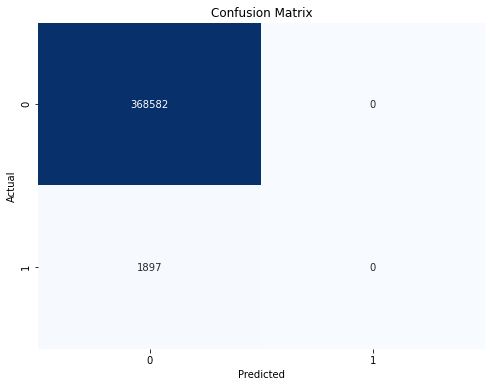

In [49]:
# Confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()